In [70]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score

In [71]:
def preChangeImg(img,treshhold1,treshhold2):
    img = cv2.imread(img,1)
    img = cv2.resize(img, (100, 100))
    img=cv2.GaussianBlur(img,(9,9),0)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.Canny(img,treshhold1,treshhold2)
    return img

In [72]:
os.listdir()
os.chdir('raw-img')
animals=os.listdir()
X=[]
y=[]
for animal in animals:
    os.chdir(animal)
    for img in os.listdir():
        X.append(preChangeImg(img,80,60))
        y.append(animal)
    os.chdir('../')
os.chdir('../')

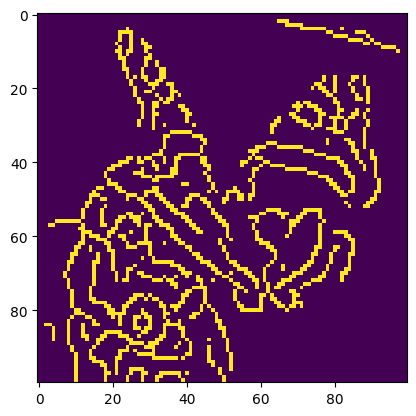

In [73]:
plt.imshow(X[750])
plt.show()

In [74]:
y[750]

'butterfly'

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
x_train=np.array(x_train)/255
x_test=np.array(x_test)/255


In [76]:
y_train_cat=pd.get_dummies(y_train).values
y_test_cat=pd.get_dummies(y_test).values

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [77]:
x_train[0].shape

(100, 100, 1)

In [78]:
model = keras.Sequential([
    Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [79]:
 print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 100, 100, 8)       80        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 16)        1168      
                                                                 
 conv2d_23 (Conv2D)          (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 25, 25, 32)       

In [80]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

Epoch 1/5
524/524 [==============================] - 57s 106ms/step - loss: 2.1179 - accuracy: 0.2390 - val_loss: 1.9191 - val_accuracy: 0.3466
Epoch 2/5
524/524 [==============================] - 59s 112ms/step - loss: 1.8217 - accuracy: 0.3665 - val_loss: 1.7182 - val_accuracy: 0.3984
Epoch 3/5
524/524 [==============================] - 60s 115ms/step - loss: 1.6127 - accuracy: 0.4401 - val_loss: 1.5754 - val_accuracy: 0.4514
Epoch 4/5
524/524 [==============================] - 61s 116ms/step - loss: 1.4074 - accuracy: 0.5113 - val_loss: 1.6037 - val_accuracy: 0.4634
Epoch 5/5
164/164 [==============================] - 3s 17ms/step - loss: 1.6840 - accuracy: 0.4566


[1.6839874982833862, 0.45664629340171814]

In [ ]:
x_train

In [ ]:
y_train

Тестирование

1) точность в числах

In [37]:
def print_logisitc_metrics_1(y_true, y_pred):
    y_true=y_true.index(max(y_true))
    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print_logisitc_metrics(y_test, y_pred)

In [ ]:
model.predict(np.array([x_test[0]]))

In [ ]:
.shape

2)Наглядное использование

In [ ]:
def demonstration(img,animals):
    img_matrix=np.array(preChangeImg(img,50,50))/255
    #np.expand_dims(img_matrix, axis=3)
    y_pred=model.predict(np.array([x_test[0]]))[0]
    y_pred=list(y_pred).index(max(y_pred))
    animal=animals[y_pred]
    print(animal)
    plt.imshow(cv2.imread(img))
    plt.show()

In [ ]:
demonstration("spider\ea34b6092af2073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg",animals)

In [ ]:
cv2.imread("spider\ea34b6092af2073ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg",1)

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10,random_state=42)

In [23]:
def prepXforNeib(X):
    X_k=np.array(X)
    X_k=X_k.reshape(X_k.shape[0], -1)
    return X_k

In [53]:
def print_logisitc_metrics_2(y_true, y_pred):    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='weighted')
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [ ]:
X_k

In [ ]:
k_means.fit(X_k)

In [ ]:
k_means.predict([X_k[0]])

In [88]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [89]:
x_train=prepXforNeib(x_train)
x_test=prepXforNeib(x_test)

In [90]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
x_test.shape

(5236, 10000)

In [92]:
y_pred=neigh.predict(x_test)

In [93]:
print_logisitc_metrics_2(y_test, y_pred)

acc = 0.20 F1-score = 0.09
